In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [176]:
df = pd.read_csv("MetObjects.csv")
df.head()

c:\users\megan\desktop\cisc367\venv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [177]:
genders = df[df['Artist Gender'].notnull()]
genders.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
34,04.1a–c,True,True,False,35,706,The American Wing,1904.0,Vase,The Adams Vase,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/35,https://www.wikidata.org/wiki/Q83545838,NaN,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...
111,68.69.17,False,False,False,120,774,The American Wing,1968.0,Andiron,Andiron,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
112,68.69.18,False,False,False,121,774,The American Wing,1968.0,Andiron,Andiron,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203,64.202.1,False,False,False,239,743,The American Wing,1964.0,Armchair,Armchair,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
204,64.202.2,False,False,False,240,774,The American Wing,1964.0,Armchair,Armchair,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [178]:
# This is a mess
df['Artist Gender'].value_counts()

|                                                         56254
||                                                        20853
Female                                                     8565
|||                                                        6146
Female|                                                    2625
                                                          ...  
|||||||Female|||||||                                          1
||Female|||||||                                               1
|Female||Female|||                                            1
|||Female|||Female|Female||||||Female|||||||||||||||||        1
|Female||||||||||||||||||||||||||||                           1
Name: Artist Gender, Length: 277, dtype: int64

In [179]:
def parse_gender(gender: str) -> str:
    if gender == '|':
        return "male"
    elif gender == 'Female':
        return "female"
    all_pipe = True
    all_female = True
    for c in gender:
        if c != "|":
            all_pipe = False
    if gender.count("Female") == gender.count("|") + 1:
        return 'females'
    if all_pipe:
        return 'males'
    return "mixed"

#print(genders[genders["Artist Gender"]=="Female|"])
genders["Gender"] = genders.loc[:,"Artist Gender"].map(parse_gender)
genders[genders['Gender'] == 'males'].loc[:,["Gender", "Artist Gender"]].head(50)
genders.loc[:, ["Artist Gender","Gender"]].head(50)

# I spent a lot of time looking up examples on the Met's website to make sure I was interpreting the artist gender column correctly

<ipython-input-179-08924a9ceb8a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genders["Gender"] = genders.loc[:,"Artist Gender"].map(parse_gender)


,Artist Gender,Gender
34,|,male
111,|,male
112,|,male
203,|,male
204,|,male
220,|,male
221,|,male
241,|Female,mixed
265,|,male
266,|,male


In [180]:
genders['Gender'].value_counts()

male       56254
males      31567
female      8565
mixed       5240
females      181
Name: Gender, dtype: int64

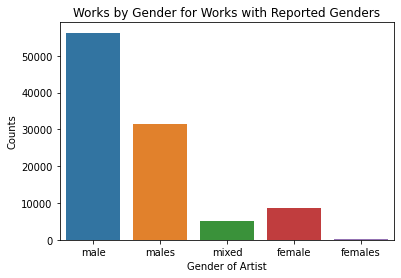

In [181]:
sns.countplot(x='Gender', data=genders,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders')

plt.show()

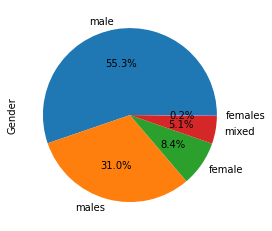

In [182]:
genders_data = genders['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #yikes

# Genders in modern art

In [217]:
genders_modern = genders[genders["Department"] == "Modern and Contemporary Art"]
genders_modern.loc[:, ["Title", "Object Begin Date"]]

,Title,Object Begin Date
8711,Vase,1894
117662,Chess Set,1918
321930,Vase,1904
321931,Vase,1900
321935,Textile sample,1900
...,...,...
474028,"""Stratoware"" Salt shaker",1940
474029,"""Stratoware"" Pepper shaker",1940
474030,"""Stratoware"" Pitcher with lid",1940
474154,"""Radiaver"" radiator",1937


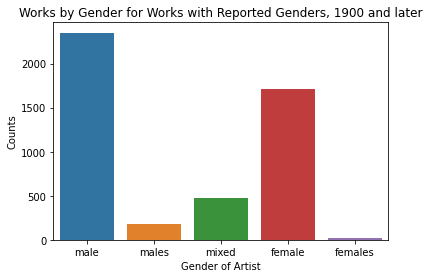

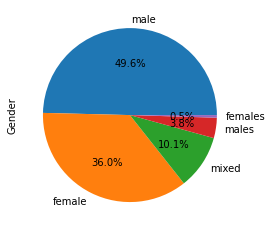

In [218]:
sns.countplot(x='Gender', data=genders_modern,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_modern['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #slightly better!

# Works acquired after the 1989 Guerilla Girls piece

In [219]:
genders_new_acq = genders[genders["AccessionYear"].notnull()]

def parse_date(date)-> int:
    if isinstance(date,float) or isinstance(date,int):
        return int(date)
    else:
        return int(date[0:4])
genders_new_acq['AccessionYear'] = genders_new_acq.AccessionYear.map(parse_date)
genders_new_acq = genders_new_acq[genders_new_acq["AccessionYear"]>=1989]
genders_modern.loc[:, ["Title", "AccessionYear"]]

<ipython-input-219-2175d1bb5ffa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genders_new_acq['AccessionYear'] = genders_new_acq.AccessionYear.map(parse_date)


,Title,AccessionYear
8711,Vase,1976.0
117662,Chess Set,1991.0
321930,Vase,1905.0
321931,Vase,1907.0
321935,Textile sample,1908.0
...,...,...
474028,"""Stratoware"" Salt shaker",2002.0
474029,"""Stratoware"" Pepper shaker",2002.0
474030,"""Stratoware"" Pitcher with lid",2002.0
474154,"""Radiaver"" radiator",2020.0


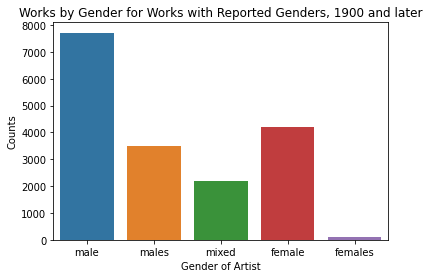

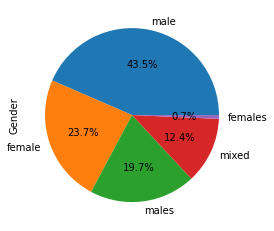

In [220]:
sns.countplot(x='Gender', data=genders_new_acq,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_new_acq['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #also better

# Works Produced After Guerilla Girls Piece

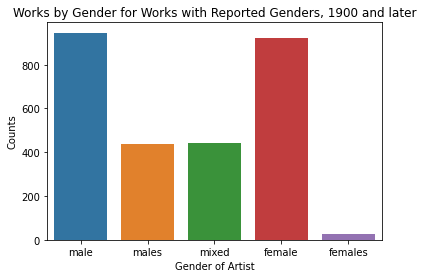

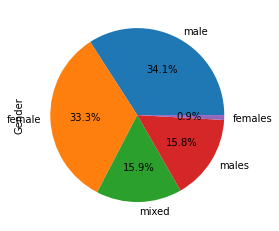

In [187]:
genders_contemp = genders[genders["Object Begin Date"] >= 1989]
sns.countplot(x='Gender', data=genders_contemp,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_contemp['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #also better

# Looking at years of female works vs. male works

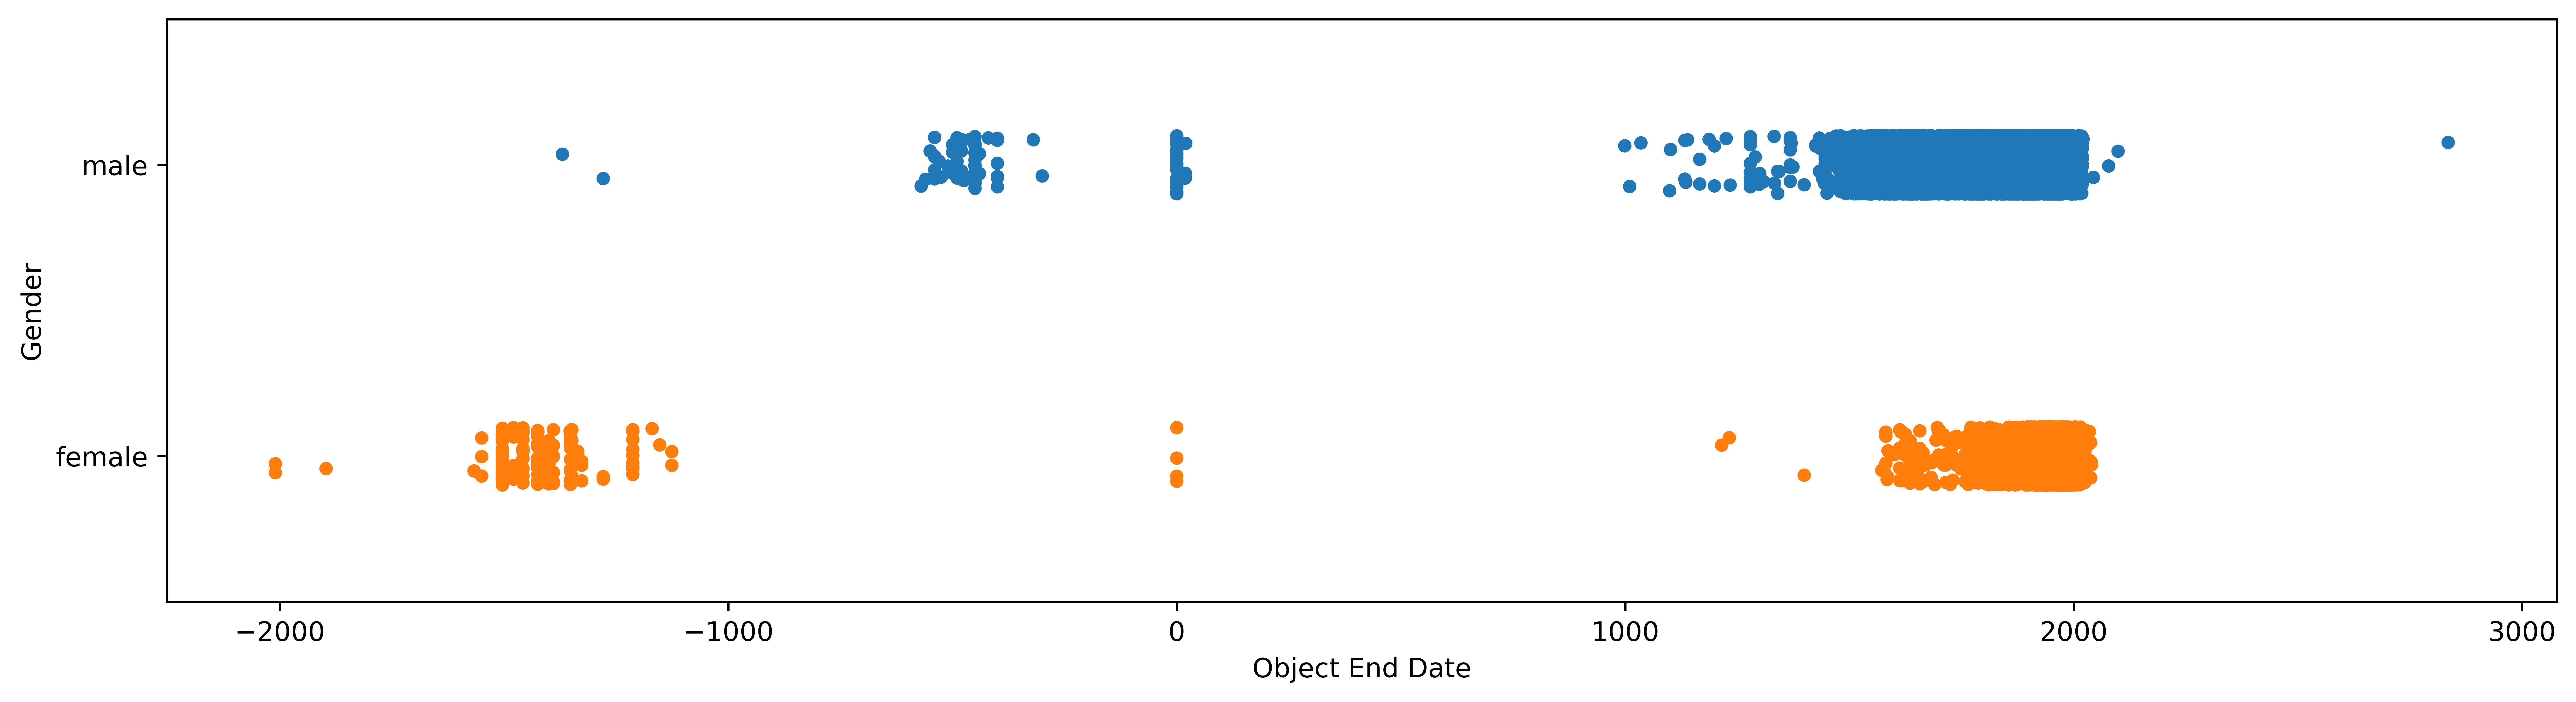

In [188]:
single_gender = genders[(genders["Gender"] == "male") | (genders["Gender"]=="female")]
plt.figure(figsize=(16,4), dpi=800)
sns.stripplot(y="Gender", x="Object End Date", data = single_gender)
plt.show()
# I really want a swarm plot but it will likely take forever to work and then be unusable anyway :(



In [189]:
df[df["Object End Date"]==-2010].loc[:, ["Artist Gender", "Department", "Object Number"]]

,Artist Gender,Department,Object Number
339897,NaN,Egyptian Art,12.183.8
340430,NaN,Egyptian Art,10.130.981
340436,NaN,Egyptian Art,26.7.46
340561,Female,Egyptian Art,31.6.1
340562,Female,Egyptian Art,31.6.2
345437,NaN,Egyptian Art,66.99.155
347476,NaN,Egyptian Art,32.8.1
347486,NaN,Egyptian Art,90.6.4


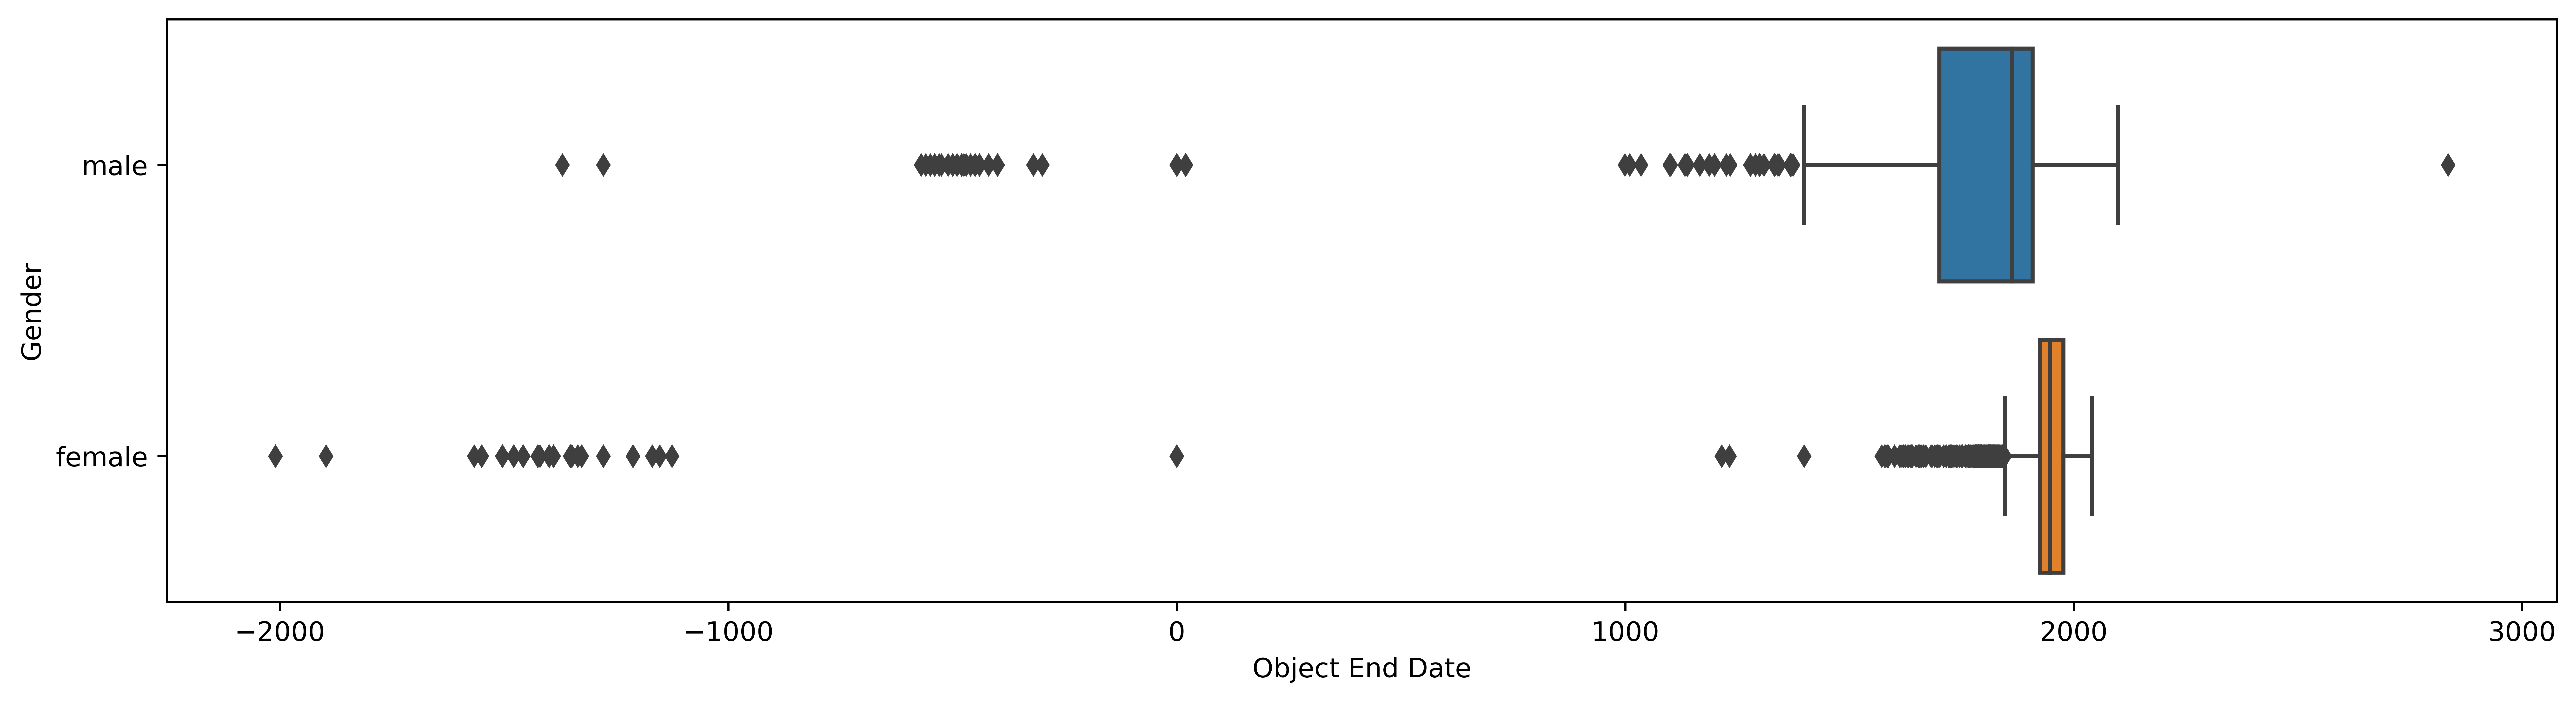

In [190]:
single_gender = genders[(genders["Gender"] == "male") | (genders["Gender"]=="female")]
plt.figure(figsize=(16,4), dpi=800)
sns.boxplot(y="Gender", x="Object End Date", data = single_gender)
plt.show()

In [191]:
df["Artist Nationality"].value_counts()

American                                                                                       52040
French                                                                                         18588
Italian                                                                                        12449
French|French                                                                                   9132
British                                                                                         8510
                                                                                               ...  
Spanish|Spanish|Spanish|Spanish?                                                                   1
Flemish|Flemish|Flemish?                                                                           1
American, born Switzerland|Belgian, born Russia                                                    1
German, born Switzerland|German                                                            

In [192]:
#Filter for only single artists
def get_single_artists(nationality: str):
    if not nationality:
        return None
    if "|" in str(nationality):
        return None
    else:
        return str(nationality)
df['nat'] = df["Artist Nationality"].apply(get_single_artists)
one_artist = df[(df.nat != "nan")&(df.nat.notnull())]
one_artist

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,nat
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,American
11,1979.486.7,False,False,False,12,NaN,The American Wing,1979.0,Coin,Twenty-dollar Liberty Head Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/12,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,American
32,64.62,False,False,False,33,774,The American Wing,1964.0,Bust,Bust of Abraham Lincoln,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/33,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Men|Abraham Lincoln|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...,American
36,38.165.51,False,False,True,37,774,The American Wing,1938.0,Figure,Figure of Admiral George Rodney,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/37,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cannons|Swords|Men,http://vocab.getty.edu/page/aat/300036936|http...,https://www.wikidata.org/wiki/Q81103|https://w...,French
37,38.165.50,False,False,True,38,774,The American Wing,1938.0,Figure,Figure of Admiral Samuel Hood,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/38,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cannons|Swords|Men|Admirals,http://vocab.getty.edu/page/aat/300036936|http...,https://www.wikidata.org/wiki/Q81103|https://w...,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402313,27.78.1(74),False,False,False,690404,NaN,Drawings and Prints,1927.0,Print,"Wilton album, folio 17g: A woman holding a jug...",...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Italian
402317,27.78.1(76),False,False,False,690408,NaN,Drawings and Prints,1927.0,Print,"Wilton album, folio 17i: A Woman Holding a Ves...",...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Italian
402318,27.78.1(77),False,False,False,690409,NaN,Drawings and Prints,1927.0,Print,"Wilton album, folio 17j: A Woman facing left h...",...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Italian
402332,54.524.77(2),False,False,False,690428,NaN,Drawings and Prints,1954.0,Book,A Drawing Book of Landscapes,...,Books,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,American


# I just realized I should've done country not nationality :|

In [193]:
#Filter for only single artists
def get_single_artists(country:str):
    if not country:
        return None
    if "|" in str(country):
        return None
    else:
        return str(country).strip()
df['nat'] = df["Country"].apply(get_single_artists)
one_artist = df[(df.nat != "nan")&(df.nat.notnull())]
one_artist

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,nat
14,16.74.49,False,False,False,15,NaN,The American Wing,1916.0,Coin,"Coin, 1/2 Real",...,NaN,NaN,http://www.metmuseum.org/art/collection/search/15,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Mexico
15,16.74.27,False,False,False,16,NaN,The American Wing,1916.0,Peso,"Coin, 1/4 Peso",...,NaN,NaN,http://www.metmuseum.org/art/collection/search/16,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Mexico
16,16.74.28,False,False,False,17,NaN,The American Wing,1916.0,Peso,"Coin, 1/4 Peso",...,NaN,NaN,http://www.metmuseum.org/art/collection/search/17,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Mexico
17,16.74.29,False,False,False,18,NaN,The American Wing,1916.0,Peso,"Coin, 1/4 Peso",...,NaN,NaN,http://www.metmuseum.org/art/collection/search/18,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Mexico
18,16.74.30,False,False,False,19,NaN,The American Wing,1916.0,Peso,"Coin, 1/4 Peso",...,NaN,NaN,http://www.metmuseum.org/art/collection/search/19,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474527,PR8861.L6 H5 1892,True,False,True,845714,NaN,The Libraries,NaN,NaN,Irish love-songs / selected by Katharine Tynan,...,|,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,England
474559,2020.377,False,False,False,845816,NaN,The American Wing,2020.0,Necklace,Necklace,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,United States
474560,1974.Kwoma.Ceiling,False,False,False,845837,NaN,"Arts of Africa, Oceania, and the Americas",1978.0,Ceiling,Ceremonial House Ceiling,...,Bark-Paintings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Papua New Guinea
474669,2020.385,False,False,False,847602,NaN,"Arts of Africa, Oceania, and the Americas",2020.0,Skirt,Lau Pahudu (Woman’s skirt),...,Textiles,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Indonesia


In [194]:
# from https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b 
# generate country code  based on country name 
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        if country.count(", ")>1:
            country = country.split(", ")[0]
        elif "or" in country.split(" "):
            country = country.split(" or ")[0]
        elif "probably" in country.split(" ") and len(country.split("probably ")) >1:
            country = country.split("probably ")[1]
        elif "possibly" in country.split(" ") and len(country.split("possibly ")) >1:
            country = country.split("possibly ")[1]
        elif "present-day" in country.split(" ") and len(country.split("present-day ")) >1:
            country = country.split("present-day ")[1]
        elif "?" in country:
            country = country[:-1].strip()
        try:
            code=pycountry.countries.get(name=country.strip()).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            # added this myself
            if country == "England" or country == "Scotland":
                code=pycountry.countries.get(name="United Kingdom").alpha_3
                CODE.append(code)
            elif country == "Iran":
                code=pycountry.countries.get(name="Iran, Islamic Republic of").alpha_3
                CODE.append(code)
            elif country == "U.S.A." or country == "America":
                code=pycountry.countries.get(name="United States").alpha_3 
                CODE.append(code)
            elif country == "Czech Republic":
                code=pycountry.countries.get(name='Czechia').alpha_3
                CODE.append(code)
            elif country == "Holland":
                code=pycountry.countries.get(name='Netherlands').alpha_3
                CODE.append(code)
            elif country == "Russia":
                code=pycountry.countries.get(name='Russian Federation').alpha_3
                CODE.append(code)
            elif country == "Democratic Republic of Congo" or country=="Democratic Republic of the Congo":
                code=pycountry.countries.get(name="Congo").alpha_3
                CODE.append(code)
            elif country == "Byzantine Egypt" or country == "Egypt and Sudan" or country == "Egypt possibly":
                code=pycountry.countries.get(name="Egypt").alpha_3
                CODE.append(code)
            elif country == "Syria":
                code=pycountry.countries.get(name="Syrian Arab Republic").alpha_3
                CODE.append(code)
            elif "France" in country:
                code=pycountry.countries.get(name="France").alpha_3
                CODE.append(code)
            elif country == "Bolivia":
                code=pycountry.countries.get(name="Bolivia, Plurinational State of").alpha_3
                CODE.append(code)
            elif "Uzbekistan" in country:
                code=pycountry.countries.get(name="Uzbekistan").alpha_3
                CODE.append(code)
            elif country == "Republic of Benin":
                code=pycountry.countries.get(name="Benin").alpha_3
                CODE.append(code)
            elif country == "Palestine":
                code=pycountry.countries.get(name="Palestine, State of").alpha_3
                CODE.append(code)
            elif country == "Nubia (Sudan)":
                code=pycountry.countries.get(name="Sudan").alpha_3
                CODE.append(code)
            elif country == "Myanmar (formerly Burma)":
                code=pycountry.countries.get(name="Myanmar").alpha_3
                CODE.append(code)
            elif country == "Korea":
                code=pycountry.countries.get(name="Korea, Democratic People's Republic of").alpha_3
                CODE.append(code)
            else:
                CODE.append('None')
    return CODE
# create a column for code 
one_artist['CODE']=alpha3code(one_artist.nat)
one_artist[one_artist["CODE"]=='None'].nat.value_counts()

<ipython-input-194-5869c6b1d425>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_artist['CODE']=alpha3code(one_artist.nat)


Tanzania                       33
Northern India                 32
South Netherlands              31
Tibet                          31
Borneo                         26
                               ..
Republic of Timor-Leste         1
possibly Dem. Rep. of Congo     1
modern-day Afghanistan          1
Northwestern Iran or Turkey     1
possibly Gaul                   1
Name: nat, Length: 324, dtype: int64

In [195]:
country_counts = one_artist.CODE.value_counts()
country_counts

EGY    33319
USA     9336
IRN     6304
PER     3404
FRA     2122
       ...  
ROU        1
SVN        1
GMB        1
SSD        1
KWT        1
Name: CODE, Length: 146, dtype: int64

In [197]:
#import geopandas
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
#world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
#merge=pd.merge(world,one_artist,on='CODE')

NameError: name 'world' is not defined

In [198]:
#https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
countries = pd.read_csv("countries.csv")
countries["CODE"] = countries['alpha-3']
df1 = pd.merge(countries.loc[:, ["CODE","name","region"]], one_artist)
df1

,CODE,name,region,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,nat
0,AFG,Afghanistan,Asia,1979.65.1a–c,False,False,False,85437,NaN,Islamic Art,...,Main dress-Womenswear,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan
1,AFG,Afghanistan,Asia,1971.83.3,False,False,True,85506,NaN,Islamic Art,...,Main dress-Womenswear,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Dresses,http://vocab.getty.edu/page/aat/300046159,https://www.wikidata.org/wiki/Q200539,probably Afghanistan
2,AFG,Afghanistan,Asia,1981.82,False,False,False,85514,NaN,Islamic Art,...,Outerwear-Womenswear,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan
3,AFG,Afghanistan,Asia,1975.147,False,False,False,85516,NaN,Islamic Art,...,Main dress-Womenswear,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,present-day Afghanistan
4,AFG,Afghanistan,Asia,"1971.83.2a, b",False,False,False,88926,NaN,Islamic Art,...,Accessory-Foot and Leg wear,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Shoes,http://vocab.getty.edu/page/aat/300046065,https://www.wikidata.org/wiki/Q22676,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73319,ZWE,Zimbabwe,Africa,2001.759.3,False,False,False,318950,352.0,"Arts of Africa, Oceania, and the Americas",...,Wood-Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe
73320,ZWE,Zimbabwe,Africa,2001.759.4,False,True,False,318951,NaN,"Arts of Africa, Oceania, and the Americas",...,Wood-Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe or Mozambique
73321,ZWE,Zimbabwe,Africa,89.4.2055,False,False,False,502622,NaN,Musical Instruments,...,Idiophone-Shaken-rattle,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe
73322,ZWE,Zimbabwe,Africa,2014.523.3,False,False,False,635754,352.0,"Arts of Africa, Oceania, and the Americas",...,Wood-Musical Instruments|Metal-Implements,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe


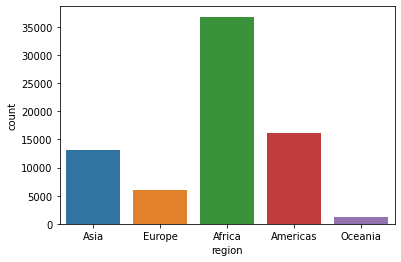

In [199]:
sns.countplot(x = "region", data = df1)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Department'>

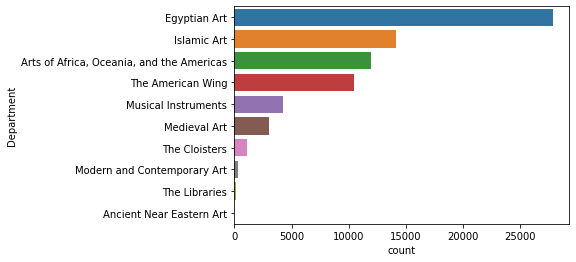

In [200]:
sns.countplot(y = 'Department', 
              data = df1,
              order = df1.Department.value_counts().index)

In [201]:
def process_makers(creator: str) -> str:
    return str(creator).split("|")[0]

df1['creator'] = df["Artist Role"].apply(process_makers)
creators = df1[df1['creator']!= "nan"]
creators

,CODE,name,region,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,nat,creator
0,AFG,Afghanistan,Asia,1979.65.1a–c,False,False,False,85437,NaN,Islamic Art,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan,Maker
1,AFG,Afghanistan,Asia,1971.83.3,False,False,True,85506,NaN,Islamic Art,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Dresses,http://vocab.getty.edu/page/aat/300046159,https://www.wikidata.org/wiki/Q200539,probably Afghanistan,Maker
9,AFG,Afghanistan,Asia,91.1.607,True,True,True,444607,455.0,Islamic Art,...,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29384955,NaN,"Metropolitan Museum of Art, New York, NY",Arabic,http://vocab.getty.edu/page/aat/300387843,https://www.wikidata.org/wiki/Q13955,present-day Afghanistan,Maker
10,AFG,Afghanistan,Asia,06.1023,False,False,True,444971,NaN,Islamic Art,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan or Turkmenistan,Maker
11,AFG,Afghanistan,Asia,08.100,False,False,True,445237,NaN,Islamic Art,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506,present-day Afghanistan,Maker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73319,ZWE,Zimbabwe,Africa,2001.759.3,False,False,False,318950,352.0,"Arts of Africa, Oceania, and the Americas",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe,Design House
73320,ZWE,Zimbabwe,Africa,2001.759.4,False,True,False,318951,NaN,"Arts of Africa, Oceania, and the Americas",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe or Mozambique,Designer
73321,ZWE,Zimbabwe,Africa,89.4.2055,False,False,False,502622,NaN,Musical Instruments,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe,Designer
73322,ZWE,Zimbabwe,Africa,2014.523.3,False,False,False,635754,352.0,"Arts of Africa, Oceania, and the Americas",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe,Designer


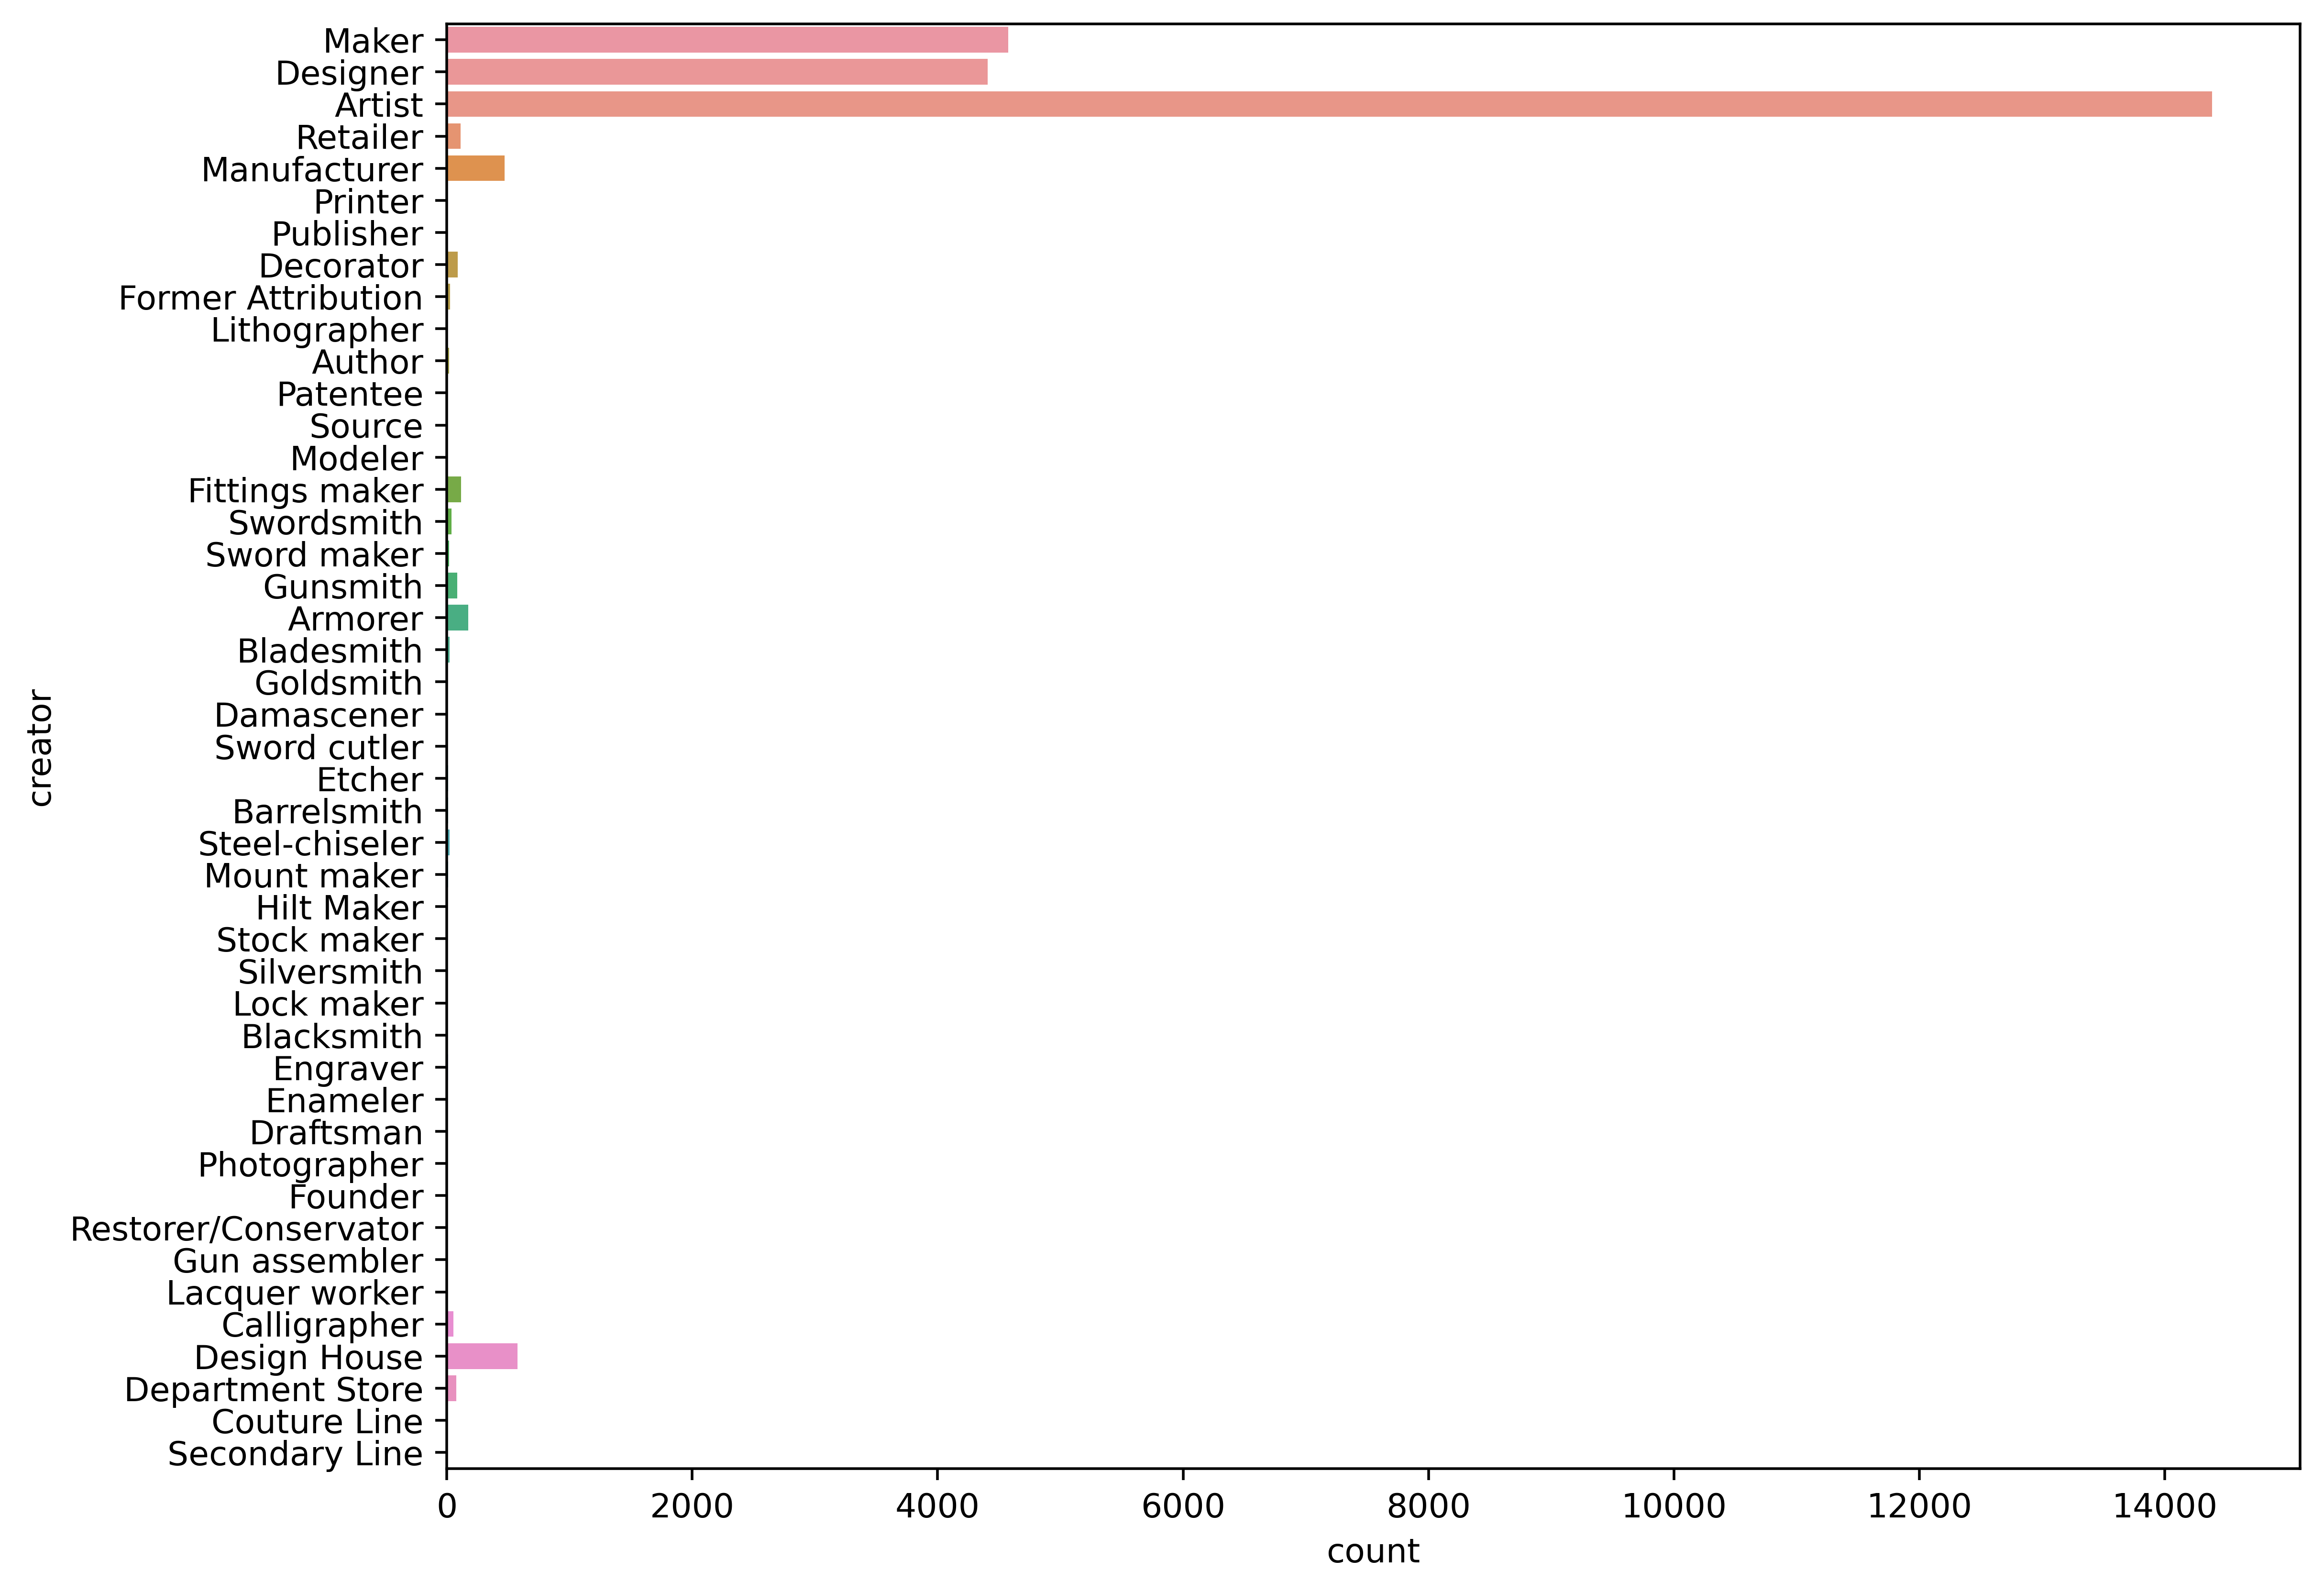

In [202]:
plt.figure(figsize=(10,8), dpi=500)
sns.countplot(y = 'creator',data=creators)

plt.show()

In [203]:
def artistornot(creator: str) -> str:
    if creator == 'Artist':
        return "artist"
    return 'non-artist'

    
creators['artist'] = creators["creator"].apply(artistornot)
creators

<ipython-input-203-2ee273cdb44f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creators['artist'] = creators["creator"].apply(artistornot)


,CODE,name,region,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,...,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,nat,creator,artist
0,AFG,Afghanistan,Asia,1979.65.1a–c,False,False,False,85437,NaN,Islamic Art,...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan,Maker,non-artist
1,AFG,Afghanistan,Asia,1971.83.3,False,False,True,85506,NaN,Islamic Art,...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Dresses,http://vocab.getty.edu/page/aat/300046159,https://www.wikidata.org/wiki/Q200539,probably Afghanistan,Maker,non-artist
9,AFG,Afghanistan,Asia,91.1.607,True,True,True,444607,455.0,Islamic Art,...,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29384955,NaN,"Metropolitan Museum of Art, New York, NY",Arabic,http://vocab.getty.edu/page/aat/300387843,https://www.wikidata.org/wiki/Q13955,present-day Afghanistan,Maker,non-artist
10,AFG,Afghanistan,Asia,06.1023,False,False,True,444971,NaN,Islamic Art,...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Afghanistan or Turkmenistan,Maker,non-artist
11,AFG,Afghanistan,Asia,08.100,False,False,True,445237,NaN,Islamic Art,...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506,present-day Afghanistan,Maker,non-artist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73319,ZWE,Zimbabwe,Africa,2001.759.3,False,False,False,318950,352.0,"Arts of Africa, Oceania, and the Americas",...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe,Design House,non-artist
73320,ZWE,Zimbabwe,Africa,2001.759.4,False,True,False,318951,NaN,"Arts of Africa, Oceania, and the Americas",...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Headrests,http://vocab.getty.edu/page/aat/300248658,https://www.wikidata.org/wiki/Q6105860,Zimbabwe or Mozambique,Designer,non-artist
73321,ZWE,Zimbabwe,Africa,89.4.2055,False,False,False,502622,NaN,Musical Instruments,...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe,Designer,non-artist
73322,ZWE,Zimbabwe,Africa,2014.523.3,False,False,False,635754,352.0,"Arts of Africa, Oceania, and the Americas",...,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,Zimbabwe,Designer,non-artist


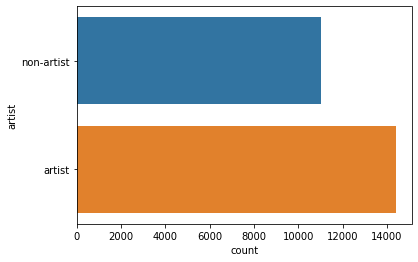

In [204]:
sns.countplot(y = 'artist',data=creators)
plt.show()

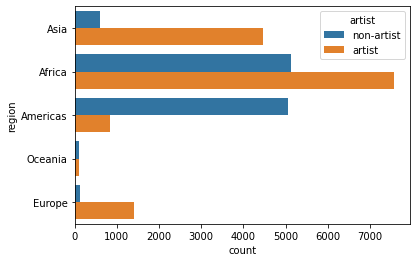

In [205]:
sns.countplot(y = 'region', hue = 'artist', data = creators)
plt.show()

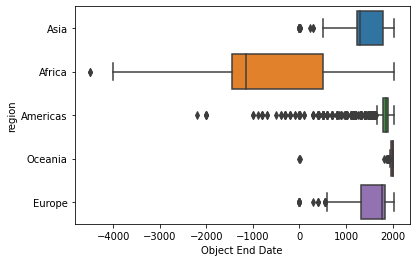

In [206]:
sns.boxplot(x = 'Object End Date', y = 'region', data = creators)
plt.show()

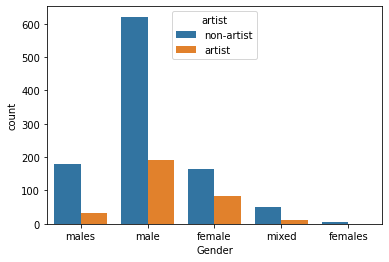

In [211]:
combined = pd.merge(creators, genders)
sns.countplot(x = 'Gender', hue = 'artist', data = combined)
plt.show()